## IMPORT LIBS

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### IMPORT DATASETS

In [2]:
train = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/train.csv")
test = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/test.csv")
gender = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/gender_submission.csv")

## DATA EXPLORATION

### DATA PREPARATION

In [3]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [5]:
# f = plt.figure(figsize=(19, 15))
# plt.matshow(train.corr(), fignum=f.number)
# plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
# plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=18)
# plt.title('Correlation Matrix', fontsize=16)

#### VARIABLES INFORMATIONS

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

## DATA CLEANING

#### DELETE COLUMNS

In [8]:
train = train.drop(["PassengerId", "Cabin", "Ticket", "Name"], axis=1)

In [9]:
train

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

#### GET ALL NaN Columns

In [10]:
NaNColumns = train.columns[train.isna().any()].tolist()
NaNColumns

['Age', 'Embarked']

#### DELETE NaN Rows

In [11]:
train = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
train

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
885         0       3  female  39.0      0      5  29.1250        Q
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[712 rows x 8 columns]

# DATA EXPLORATION

In [12]:
print("Survived :" ,len(train[train['Survived'] == 1]))
print("Not Survived :",len(train[train['Survived'] == 0]))

Survived : 288
Not Survived : 424


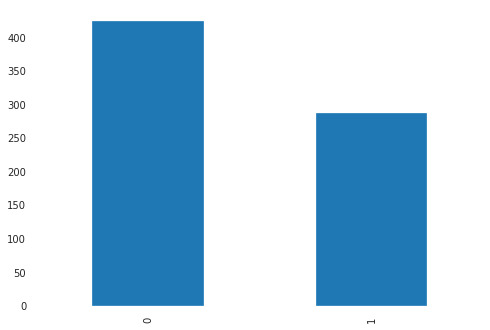

In [13]:
train['Survived'].value_counts().plot.bar()

In [14]:
train['Female']=list(map(lambda x: int(x=='female'), train['Sex']))

In [15]:
train.groupby(['Sex','Pclass']).mean()

Survived        Age     SibSp     Parch        Fare  Female
Sex    Pclass                                                             
female 1       0.963855  34.240964  0.554217  0.506024  108.619680     1.0
       2       0.918919  28.722973  0.500000  0.621622   21.951070     1.0
       3       0.460784  21.750000  0.823529  0.950980   15.875369     1.0
male   1       0.396040  41.281386  0.376238  0.336634   71.142781     0.0
       2       0.151515  30.740707  0.373737  0.242424   21.113131     0.0
       3       0.150198  26.507589  0.490119  0.256917   12.162695     0.0

In [53]:
train[train['Age']<18]['Pclass'].value_counts()

3    78
2    23
1    12
Name: Pclass, dtype: int64

# DATA TRANSFORMATION

In [17]:
train["Embarked"] = train["Embarked"].astype('category').cat.codes
train["Sex"] = train["Sex"].astype('category').cat.codes

train

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Female
0           0       3    1  22.0      1      0   7.2500         2       0
1           1       1    0  38.0      1      0  71.2833         0       1
2           1       3    0  26.0      0      0   7.9250         2       1
3           1       1    0  35.0      1      0  53.1000         2       1
4           0       3    1  35.0      0      0   8.0500         2       0
..        ...     ...  ...   ...    ...    ...      ...       ...     ...
885         0       3    0  39.0      0      5  29.1250         1       1
886         0       2    1  27.0      0      0  13.0000         2       0
887         1       1    0  19.0      0      0  30.0000         2       1
889         1       1    1  26.0      0      0  30.0000         0       0
890         0       3    1  32.0      0      0   7.7500         1       0

[712 rows x 9 columns]

# STATICTIC TEST

Test d’hypothèse pour savoir si oui ou non, les enfants ont été privilégiés lors du naufrage.
<br>
Test d’hypothèse pour vérifier si oui ou non, les femmes ont été privilégiées lors du naufrage.

In [93]:
import scipy.stats as stats

def fisherstats():
    return stats.fisher_exact([[train["Pclass"][0], train["Sex"][0]], [train["Pclass"][0], train['Age'][0]<18]])
    
oddsratio, pvalue = fisherstats()

In [94]:
print(oddsratio)

0.0


# CREATING MODEL

In [96]:
X = train.drop('Survived',axis=1)
y = train['Survived']
train.shape

(712, 9)

In [19]:
from sklearn.model_selection import train_test_split
np.random.seed(3456)
# data_split = train_test_split(np.asmatrix(data), test_size = 0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)



# X_train = data_split[0]
# y_train = np.ravel(data_split[0][:, 0])
# X_test = data_split[1]
# y_test = np.ravel(data_split[1][:, 0])

print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(569, 8)
(143, 8)

(569,)
(143,)


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
valid_test = pd.DataFrame(X_test, columns = train.columns)
valid_test['predicted'] = model.predict(X_test)
valid_test['correct'] = [1 if x == z else 0 for x, z in zip(valid_test['predicted'], y_test)]

score = model.score(X_test, y_test)
accuracy = float(sum(valid_test['correct'])) / float(valid_test.shape[0])

print(score)
print(accuracy)

0.8601398601398601
0.8601398601398601


In [38]:
def rmse(X_test, y_test):
    return np.sqrt( ((y_test - model.predict(X_test))**2).mean() / len(y_test) )
    
print("RMSE :", rmse(X_test, y_test))

RMSE : 0.03127367800699007


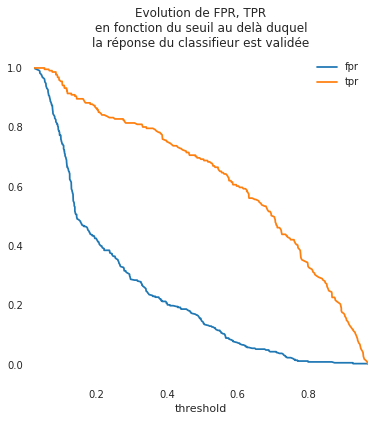

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = model.predict_proba(X_train)
fpr1, tpr1, thresholds1 = roc_curve(y_train, proba[:, 1], pos_label=model.classes_[1], drop_intermediate=False)

tp = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1, threshold=thresholds1))
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée");

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = model.predict_proba(X_train)
fpr0, tpr0, thresholds0 = roc_curve(y_train, proba[:, 0], pos_label=model.classes_[0], drop_intermediate=False)
thresholds0.shape

(531,)

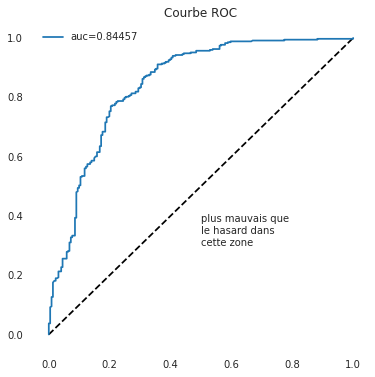

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()

In [52]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_train, model.predict(X_train)), columns=['Survived', 'Not Survived'])
cm.index = ['Survived', 'Not Survived']
cm

Survived  Not Survived
Survived           298            50
Not Survived        68           153

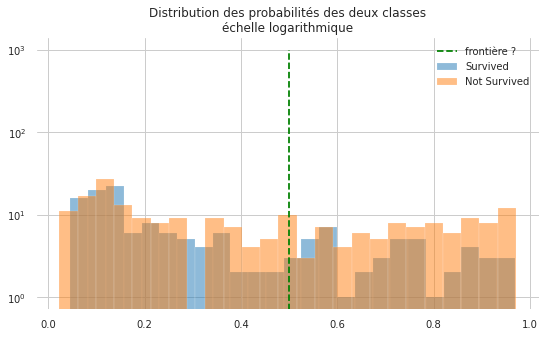

In [43]:
proba_1 = model.predict_proba(X_train)[:, 1]
pr = pd.DataFrame(proba_1, columns=['proba'])
pr['Action'] = y_train

fig, ax = plt.subplots(1,1,figsize=(9,5))

pr[pr.Action == 1]['proba'].hist(bins=25, label='Survived', alpha=0.5, ax=ax)
pr[pr.Action == 0]['proba'].hist(bins=25, label='Not Survived', alpha=0.5, ax=ax)
ax.plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax.set_yscale('log') #l'échelle logarithmique permet de mieux voir les probabilités qui sont faibles
ax.set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax.legend()

In [28]:
# csvOutPut = valid_test['resilies'] + valid_test['predicted'] + valid_test['correct']
csvOutPut = valid_test
csvOutPut['correct'] = valid_test['correct']
csvOutPut['prediction'] = valid_test['predicted']

# csvOutPut[csvOutPut['prediction'] == 1]
# csvOutPut[csvOutPut['Survived'] == 1]

csvOutPut
# csvOutPut.to_csv("/home/fakhredine/Desktop/prediction.csv", index=False)

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Female  \
647       NaN       1    1  56.0      0      0   35.500         0       0   
403       NaN       3    1  28.0      1      0   15.850         2       0   
600       NaN       2    0  24.0      2      1   27.000         2       1   
289       NaN       3    0  22.0      0      0    7.750         1       1   
322       NaN       2    0  30.0      0      0   12.350         1       1   
..        ...     ...  ...   ...    ...    ...      ...       ...     ...   
853       NaN       1    0  16.0      0      1   39.400         2       1   
171       NaN       3    1   4.0      4      1   29.125         1       0   
438       NaN       1    1  64.0      1      4  263.000         2       0   
427       NaN       2    0  19.0      0      0   26.000         2       1   
450       NaN       2    1  36.0      1      2   27.750         2       0   

     predicted  correct  prediction  
647          0        0           0  
403          0        1           0  
600          1        1           1  
289          1        1           1  
322          1        1           1  
..         ...      ...         ...  
853          1        1           1  
171          0        1           0  
438          0        1           0  
427          1        1           1  
450          0        1           0  

[143 rows x 12 columns]

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
valid_test = pd.DataFrame(X_test, columns = train.columns)
valid_test['predicted'] = model.predict(X_test)
valid_test['correct'] = [1 if x == z else 0 for x, z in zip(valid_test['predicted'], y_test)]

score = model.score(X_test, y_test)
accuracy = float(sum(valid_test['correct'])) / float(valid_test.shape[0])

print(score)
print(accuracy)

0.5039988382660378
0.0


'Done'

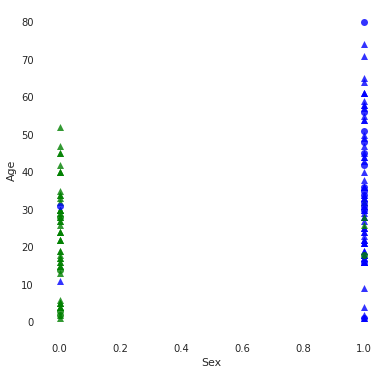

In [49]:
levels = {0:'resilies', 1:'no-resilies'}
valid_test['resilies'] = [levels[x] for x in valid_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'resilies':'blue', 'no-resilies':'green'}
def plot_shapes(df, col1,col2,  markers, colors):
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['resilies'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax
                       )
    plt.xlabel(col1)
    plt.ylabel(col2)
#     plt.title('Iris species by color')
    return 'Done'
plot_shapes(valid_test, 'Sex', 'Age', markers, colors)
# plot_shapes(valid_test, 'Sepal_Width', 'Sepal_Length', markers, colors)

# PREDICTION ON TEST FILE